In [1]:
# For GPU users
!pip install tensorflow[and-cuda]
# For CPU users
!pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip3 install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install mediapipe

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

2023-10-26 02:37:32.772793: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-26 02:37:32.796987: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-26 02:37:33.014492: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-26 02:37:33.015700: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-26 02:37:34.132988: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [6]:
mp_holistic  = mp.solutions.holistic #holistic model
mp_drawing = mp.solutions.drawing_utils #utilidades de dibujo

In [7]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # convierte de BGR a RGB
    image.flags.writeable = False  #La imagen no es writeable
    results = model.process(image)  #image es el frame del open cv, hace la prediccion
    image.flags.writeable = True     #la imagen es writable 
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR) #convierte de RGB a BGR
    return image,results 


In [8]:
def draw_landmarks(image,results): #dibujar las marcas en la imagen
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_TESSELATION) #dibuja las conecciones de la cara
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS) #Dibuja las pose conecciones
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS) #dibuja las conecciones de la mano izquierda
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS) #dibuja las conecciones de la mano derecha 

    

In [9]:
def draw_styled_landmarks(image,results): #dibuja los landmarks refinados 
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_TESSELATION,mp_drawing.DrawingSpec(color=(50,110,10),thickness=1,circle_radius=1),mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1)) #dibuja las conecciones de la cara
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS,mp_drawing.DrawingSpec(color=(80,22,10),thickness=2,circle_radius=4),mp_drawing.DrawingSpec(color=(80,44,121),thickness=2,circle_radius=2)) #Dibuja las pose conecciones
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS,mp_drawing.DrawingSpec(color=(80,22,76),thickness=2,circle_radius=4),mp_drawing.DrawingSpec(color=(121,44,250),thickness=2,circle_radius=2)) #dibuja las conecciones de la mano izquierda
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS,mp_drawing.DrawingSpec(color=(254,117,66),thickness=2,circle_radius=4),mp_drawing.DrawingSpec(color=(245,66,230),thickness=2,circle_radius=2)) #dibuja las conecciones de la mano derecha 


In [10]:
#abre la webcam y va entre los frames
cap = cv2.VideoCapture(0)
#setteamos el modelo de mediapipe
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
  while cap.isOpened():
    #lee el feed
    ret,frame = cap.read()

    #hace la deteccion
    image, results = mediapipe_detection(frame,holistic)
    print(results)
    #dibuja  los landmarks
    draw_styled_landmarks(image,results)
    #Lo muestra en la pantalla
    cv2.imshow('OpenCV Feed',image)

    #Rompe el loop si se apreta q
    if cv2.waitKey(10) & 0xFF == ord('q'):
      break
  cap.release()
  cv2.destroyAllWindows()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


<class 'mediapipe.python.solution_base.SolutionOutputs'>


qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/mache12/.local/lib/python3.10/site-packages/cv2/qt/plugins"


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [11]:
len(results.face_landmarks.landmark)

468

In [12]:
results

mediapipe.python.solution_base.SolutionOutputs

In [13]:
draw_landmarks(frame,results)

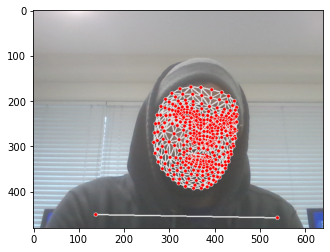

In [14]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [15]:
results.face_landmarks

landmark {
  x: 0.584773600101471
  y: 0.6651958227157593
  z: -0.043546438217163086
}
landmark {
  x: 0.5984207987785339
  y: 0.5985552072525024
  z: -0.06478030234575272
}
landmark {
  x: 0.5900341272354126
  y: 0.6201565265655518
  z: -0.0374973826110363
}
landmark {
  x: 0.5911614298820496
  y: 0.5391589403152466
  z: -0.045455869287252426
}
landmark {
  x: 0.6013952493667603
  y: 0.5802258849143982
  z: -0.06730259954929352
}
landmark {
  x: 0.6025089621543884
  y: 0.5573298931121826
  z: -0.06020502746105194
}
landmark {
  x: 0.6026893258094788
  y: 0.503815770149231
  z: -0.021012499928474426
}
landmark {
  x: 0.5073102116584778
  y: 0.4800025224685669
  z: 0.006784906145185232
}
landmark {
  x: 0.6058857440948486
  y: 0.46573203802108765
  z: -0.008068012073636055
}
landmark {
  x: 0.6093320846557617
  y: 0.44349372386932373
  z: -0.007231864146888256
}
landmark {
  x: 0.6170884966850281
  y: 0.36529600620269775
  z: 0.01812921091914177
}
landmark {
  x: 0.583367109298706
  y: 

In [16]:
pose = [] #array para gaursar los landmarks
for res in results.pose_landmarks.landmark:
    test = np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

In [17]:
pose

[array([ 0.57458681,  0.56626475, -1.83544004,  0.98432416]),
 array([ 0.6119436 ,  0.5062865 , -1.72642207,  0.97208065]),
 array([ 0.63451332,  0.5124765 , -1.72715724,  0.97516781]),
 array([ 0.65782368,  0.52060121, -1.72755754,  0.97213626]),
 array([ 0.54606783,  0.49513236, -1.75642455,  0.97365773]),
 array([ 0.51986158,  0.49311936, -1.75625646,  0.97854871]),
 array([ 0.49318066,  0.49143919, -1.75741827,  0.97934419]),
 array([ 0.68109834,  0.56343919, -1.0277257 ,  0.96992087]),
 array([ 0.44651628,  0.53924787, -1.14842832,  0.98122746]),
 array([ 0.60108286,  0.67266089, -1.5653069 ,  0.98699337]),
 array([ 0.52101994,  0.65249813, -1.60284138,  0.99047667]),
 array([ 0.84261531,  0.95340842, -0.54864496,  0.95170909]),
 array([ 0.21600263,  0.93939149, -0.68175393,  0.96805274]),
 array([ 0.98566902,  1.40787876, -0.48083109,  0.14215061]),
 array([ 0.10105683,  1.43933046, -0.51446313,  0.21954907]),
 array([ 0.95076799,  1.74893129, -1.10273242,  0.02242693]),
 array([

In [18]:
pose = np.array([[res.x,res.y,res.z,res.visibility]for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)#todos los landmarks en un solo array grande
face = np.array([[res.x,res.y,res.z]for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)#todos los landmarks en un solo array grande
lh = np.array([[res.x,res.y,res.z]for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)#todos los landmarks en un solo array grande
rh = np.array([[res.x,res.y,res.z]for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)#todos los landmarks en un solo array grande

In [19]:

def extract_keypoints(results):
    pose = np.array([[res.x,res.y,res.z,res.visibility]for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)#todos los landmarks en un solo array grande
    face = np.array([[res.x,res.y,res.z]for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)#todos los landmarks en un solo array grande
    lh = np.array([[res.x,res.y,res.z]for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)#todos los landmarks en un solo array grande
    rh = np.array([[res.x,res.y,res.z]for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)#todos los landmarks en un solo array grande
    return np.concatenate([pose,face,lh,rh])
    

In [20]:
result_test = extract_keypoints(results)

In [21]:
result_test

array([ 0.57458681,  0.56626475, -1.83544004, ...,  0.        ,
        0.        ,  0.        ])

In [22]:
np.save('0',result_test)

In [23]:
np.load('0.npy')

array([ 0.57458681,  0.56626475, -1.83544004, ...,  0.        ,
        0.        ,  0.        ])

In [24]:
extract_keypoints(results).shape

(1662,)

In [25]:
#path para la data exportada
DATA_PATH = os.path.join('MP_Data') # variable que guarda 

#Aciones detectadas
actions = np.array(['hello','thanks','iloveyou'])
no_sequences = 30 #Cantidad de videos que se recolectaran por accion
sequence_length = 30 #30 es la cantidad de frames de data que va a utilizar 
#lo que se hara para la info es recolectar 30 videos de 30 frames cada un por accion (son 3 acciones) por la cantidad de keypoints que se tienen que son 1662 (entre todas las  variables)

In [26]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass

In [27]:
cap = cv2.VideoCapture(0)
#setteamos el modelo de mediapipe
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
    #lee el feed
                ret,frame = cap.read()

    #hace la deteccion
                image, results = mediapipe_detection(frame,holistic)
                print(results)
            #dibuja  los landmarks
                draw_styled_landmarks(image,results)
            
                if frame_num == 0 :
                    cv2.putText(image,'Sarting Collection',(120,200),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),4,cv2.LINE_AA)# IMprime Starting Collection
                    cv2.putText(image,'Colelecting Frasmes for {} Video Number {}'.format(action,sequence),(15,12),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
                    cv2.waitKey(2000)
                
                else :
                    cv2.putText(image,'Colelecting Frasmes for {} Video Number {}'.format(action,sequence),(15,12),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
                
                #Exportamos los Keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH,action,str(sequence),str(frame_num))
                np.save(npy_path,keypoints)
                #Lo muestra en la pantalla
                cv2.imshow('OpenCV Feed',image)

                #Rompe el loop si se apreta q
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [28]:
cap.release()
cv2.destroyAllWindows()

In [29]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [30]:
label_map = {label:num for num, label in enumerate(actions)} #esto loopea entre cada una de las palabras

In [31]:
label_map #se estructura en un array grande por accion, se termina creando 90 arrays con 30 fraames en cada array con 1662 valores que representan los keypoints

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [32]:
sequences, labels = [],[] # sequences representa la dara y labels representa los label
for action in actions: # se loopea entre las acciones y las sequencias
    for sequence in range(no_sequences):
        window = [] #windows representa todas las ventanas de video
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH,action,str(sequence),"{}.npy".format(frame_num))) # se cargan los diferentes frames desde las carpetas  
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

FileNotFoundError: [Errno 2] No such file or directory: 'MP_Data/thanks/2/0.npy'

In [ ]:
sequences.shape

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
x = np.array(sequences)

In [ ]:
y = to_categorical(labels).astype(int)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.05)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir = log_dir)

In [35]:

model = Sequential() # Se rean layers para entrenar los modelos 
model.add(LSTM(64,return_sequences = True, activation='relu',input_shape = (30,1662)))
model.add(LSTM(128,return_sequences = True, activation='relu'))
model.add(LSTM(64,return_sequences = False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0],activation = 'softmax')) #softmas te da un conjunto de probabilidades que sumadas te suman 1  

In [ ]:
actions[np.argmax(res)]

In [ ]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'])

In [1]:

model.fit(x_train,y_train, epochs = 2000, callbacks = [tb_callback])

NameError: name 'model' is not defined

In [ ]:
res = model.predict(x_test)

In [ ]:
actions[np.sum(res[0])]

In [ ]:
actions[np.argmax(y_test[0])]

In [ ]:
model.save('action.h5')

In [ ]:
del model

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
yhat = model.predict(x_train)

In [ ]:
ytrue = np.argmax(y_test, axis = 1).tolist()
yhat =  np.argmax(yhat,axis = 1).tolist()

In [ ]:
multilabel_confusion_matrix(ytrue,yhat)

In [ ]:
accuracy_score(ytrue,yhat)

*Real time Testing*

In [1]:
#Variables de deteccion
sequence = []
sentence = []
threshold = 0.7  


#abre la webcam y va entre los frames
cap = cv2.VideoCapture(0)
#setteamos el modelo de mediapipe
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
  while cap.isOpened():
    #lee el feed
    ret,frame = cap.read()

    #hace la deteccion
    image, results = mediapipe_detection(frame,holistic)
    print(results)
    #dibuja  los landmarks
    draw_styled_landmarks(image,results)
    keypoints = extract_keypoints(results)
    sequence.insert(0,keypoints)
    #[-30:] son los ultimos 30 frames/ 30 set de keypoints
    sequence = sequence[-30:]
    
    #si la longitud de la sequencia tiene una longitud de 30 frames, recien ahi se hace la prediccion
    if len(sequence) == 30:
        res = model.predict(np.expand_dims(sequence,axis = 0))[0]
        print(actions[np.argmax(res)])
    
    #Viz logic
    if res[np.argmax(res)] > threshold:
      if len(sentence) > 0:
        if actions[np.argmax(res)] != sentence[-1]:
          sentence.append(actions[np.argmax(res)])
        else:
          sentence.append(actions[np.argmax(res)])
    
    if len(sentence) > 5:
      sentence = sentence[-5:]
    cv2.rectangle(image,(0,0),(640,40),(245,117,16),-1)
    cv2.putText(image,' '.join(sentence),(3,30),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
          
    
    #Lo muestra en la pantalla
    cv2.imshow('OpenCV Feed',image)

    #Rompe el loop si se apreta q
    if cv2.waitKey(10) & 0xFF == ord('q'):
      break
  cap.release()
  cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

In [ ]:
model.predict(x_test[0])